## Import

In [ ]:
!pip install highway-env
!pip install git+https://github.com/DLR-RM/stable-baselines3

import gymnasium as gym
import highway_env

from stable_baselines3 import DQN

In [29]:
from stable_baselines3.common.evaluation import evaluate_policy

In [30]:
import matplotlib.pyplot as plt

In [ ]:
import pprint

env = gym.make('intersection-v0')
pprint.pprint(env.config)

{'action': {'lateral': False,
            'longitudinal': True,
            'target_speeds': [0, 4.5, 9],
            'type': 'DiscreteMetaAction'},
 'arrived_reward': 1,
 'centering_position': [0.5, 0.6],
 'collision_reward': -5,
 'controlled_vehicles': 1,
 'destination': 'o1',
 'duration': 13,
 'high_speed_reward': 1,
 'initial_vehicle_count': 10,
 'manual_control': False,
 'normalize_reward': False,
 'observation': {'absolute': True,
                 'features': ['presence',
                              'x',
                              'y',
                              'vx',
                              'vy',
                              'cos_h',
                              'sin_h'],
                 'features_range': {'vx': [-20, 20],
                                    'vy': [-20, 20],
                                    'x': [-100, 100],
                                    'y': [-100, 100]},
                 'flatten': False,
                 'observe_intentions': False,


/usr/local/lib/python3.10/dist-packages/gymnasium/envs/registration.py:523: DeprecationWarning: WARN: The environment intersection-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gymnasium/utils/passive_env_checker.py:42: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (15, 7)
  logger.warn(


## DQN

In [46]:
env = gym.make('intersection-v0', render_mode='rgb_array')

model = DQN('MlpPolicy', 'intersection-v0',
                policy_kwargs=dict(net_arch=[256, 256]), #[64,64]
                learning_rate=3e-4,
                buffer_size=1000000,
                learning_starts=1000,
                batch_size=32,
                gamma=0.99,
                train_freq=1,
                gradient_steps=1,
                target_update_interval=10000,
                exploration_fraction=0.1,
                verbose=1)
model.learn(10000)

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.75     |
|    ep_rew_mean      | 3.06     |
|    exploration_rate | 0.967    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 11       |
|    time_elapsed     | 3        |
|    total_timesteps  | 35       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.38     |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.929    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 11       |
|    time_elapsed     | 6        |
|    total_timesteps  | 75       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.42     |
|    ep_rew_mean      | 1.55     |
|    exploration_rate | 0.893    |
| time/               |          |
|    episodes       

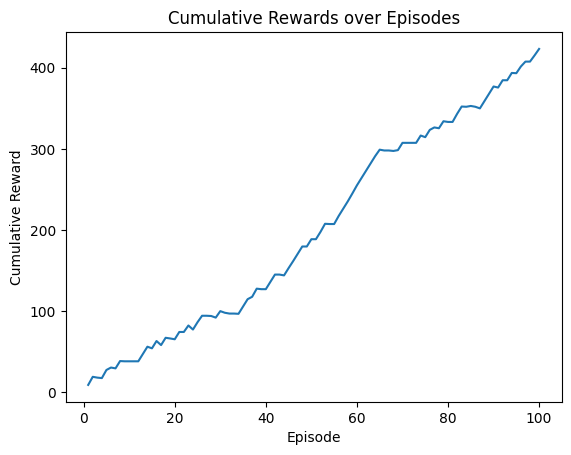

In [50]:
episodes = 100
rewards = []
cumulative_rewards = 0

for i in range(episodes):
    obs = env.reset()
    done = truncated = False
    episode_reward = 0
    
    while not done:
        action = int(model.predict(obs[0], deterministic=False)[0])
        next_obs, reward, done, truncated, info = env.step(action)
        episode_reward += reward
    
    cumulative_rewards += episode_reward
    rewards.append(cumulative_rewards.tolist())
    
# print(rewards)
    
plt.plot(range(1, episodes+1), rewards)
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Rewards over Episodes')
plt.show()

In [51]:
print(rewards[-1])

423.25842304792934


In [49]:
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10, render=False)

print(f"Mean reward: {mean_reward:.4f}")
print(f"Std reward: {std_reward:.4f}")

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Mean reward: 4.8617
Std reward: 4.8155
